<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E5%AF%BC%E8%AE%BA_Datawhale/%E7%AC%AC%203%20%E7%AB%A0%20%E5%87%BD%E6%95%B0%E6%9E%81%E5%80%BC%E4%B8%8E%E8%A7%84%E5%88%92%E6%A8%A1%E5%9E%8B/Notes_Unit3__3_7_%E6%95%B4%E6%95%B0%E8%A7%84%E5%88%92(scipy_optimize_linprog%2C_PuLP)_%2B_%E6%8C%87%E6%B4%BE%E9%97%AE%E9%A2%98(_%E5%8C%88%E7%89%99%E5%88%A9%E6%B3%95%2C_scipy_optimize_linear_sum_assignment_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=5>第 3 章 函数极值与规划模型 </font>

* <font size=4>3.7 整数规划与指派问题</font>



$~$



>整理自：
>
>开源内容：https://github.com/datawhalechina/intro-mathmodel
>
>在线学习网站：http://www.datawhale.cn/learn/summary/85

线性规划或者非线性规划当中**加上一条约束：自变量取整数**

另一类离散优化的典型例子是**匹配问题**和**组合优化问题**

经典求解算法：  分支定界法和割平面法。

### 3.7.2 分支定界法  例 3.7

**例 3.7** $~~$求规划的最优解：

$\max~~x_1+x_2+x_3$

满足:

$\begin{cases}7x_1+8x_2+7x_3\leq4\\
x_{1,2,3}=0,1\end{cases}$


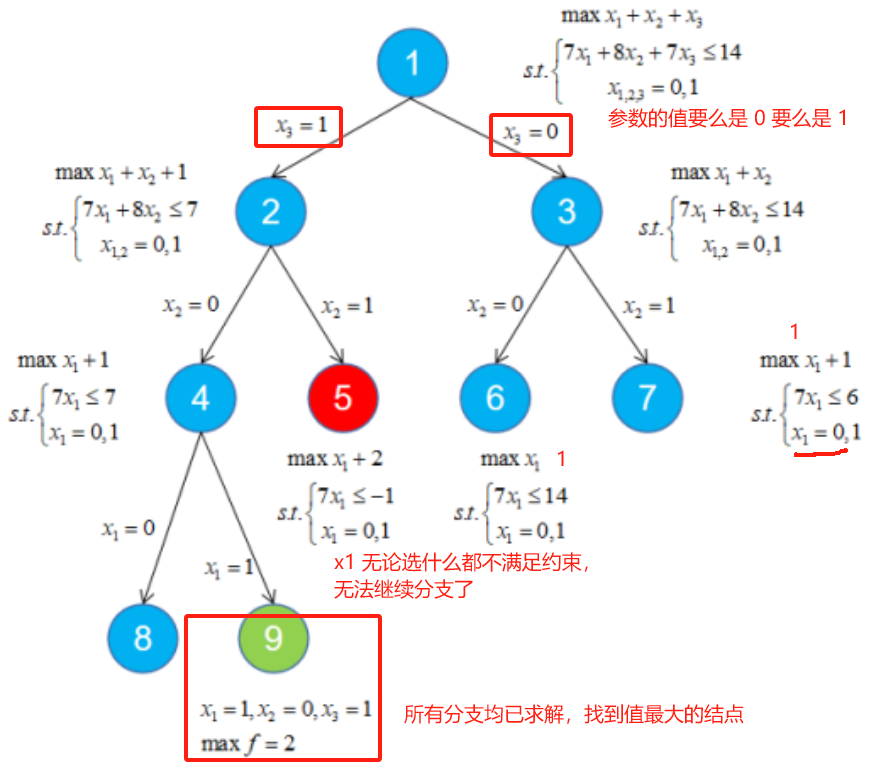

#### 用 scipy.optimize.linprog 求解

In [ ]:
from scipy.optimize import linprog

# 目标函数： 最小化
# 约束为： ≤ 形式的不等式 或 等式

c = [-1, -1, -1] # 目标函数的参数系数  这里注意改成最小化形式
A = [[7, 8, 7]]  #   约束不等式的参数系数
b = [14]
xi_bounds = (0, 1)
res = linprog(c, A_ub=A, b_ub=b, bounds=[xi_bounds]*3, integrality=1)  # integrality=1 要求变量取整数， 默认为连续变量
print("目标的最小值：", res.fun)
print("最优解 x =", res.x)
print("是否优化成功：", res.message)

目标的最小值： -2.0
最优解 x = [1. 0. 1.]
是否优化成功： Optimization terminated successfully. (HiGHS Status 7: Optimal)


#### 用 PuLP 求解

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 58.6 MB/s eta 0:00:00


In [ ]:
# !pip install pulp

from pulp import *

prob = LpProblem("用 PuLP 整数规划问题", LpMaximize)  # 最大化问题时为 LpMaximize 最小化问题为 LpMinimize

x1 = LpVariable("x1", 0, 1, LpInteger) # 要求为整数
x2 = LpVariable("x2", 0, 1, LpInteger)
x3 = LpVariable("x3", 0, 1, LpInteger)

# 增加 目标函数
prob += x1 + x2 + x3

# 添加约束
prob += 7 * x1 + 8 * x2 + 7 * x3 <= 14

prob.solve()

# 可能的求解状态：“Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("求解状态:", LpStatus[prob.status])

# 优化的参数
for v in prob.variables():
    print(v.name, "=", v.varValue)

#
print("目标最大值 = ", value(prob.objective))

求解状态: Optimal
x1 = 1.0
x2 = 0.0
x3 = 1.0
目标最大值 =  2.0


### 3.7.3 指派问题与匈牙利法

**例 3.8** $~~$现在有 4 个人 ${A,B,C,D}$ 可以做四项工作 ${1,2,3,4}$，他们每个人只能做一项工作，所需要的时间如下表所示：

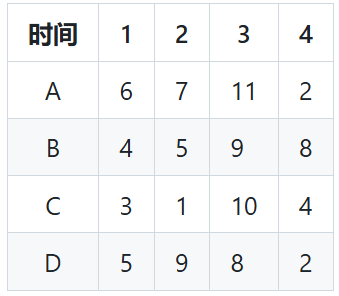

#### 匈牙利法

对于时间排布表:

* 首先将**每行减去当前行的最小值**，然后将**每一列的值减去当前列的最小值**。
* 接下来 **用最少的水平线和竖直线覆盖所有的**
0  项。
   * 如果线条总数为 4 ，那么算法停止，给出指派方案；
   * 如果少于 4 条则计算<font color=blue>没有被覆盖的最小值</font>，**将没有被覆盖的每行减去最小值**，**被覆盖的每列加上最小值**，然后重新进行覆盖.

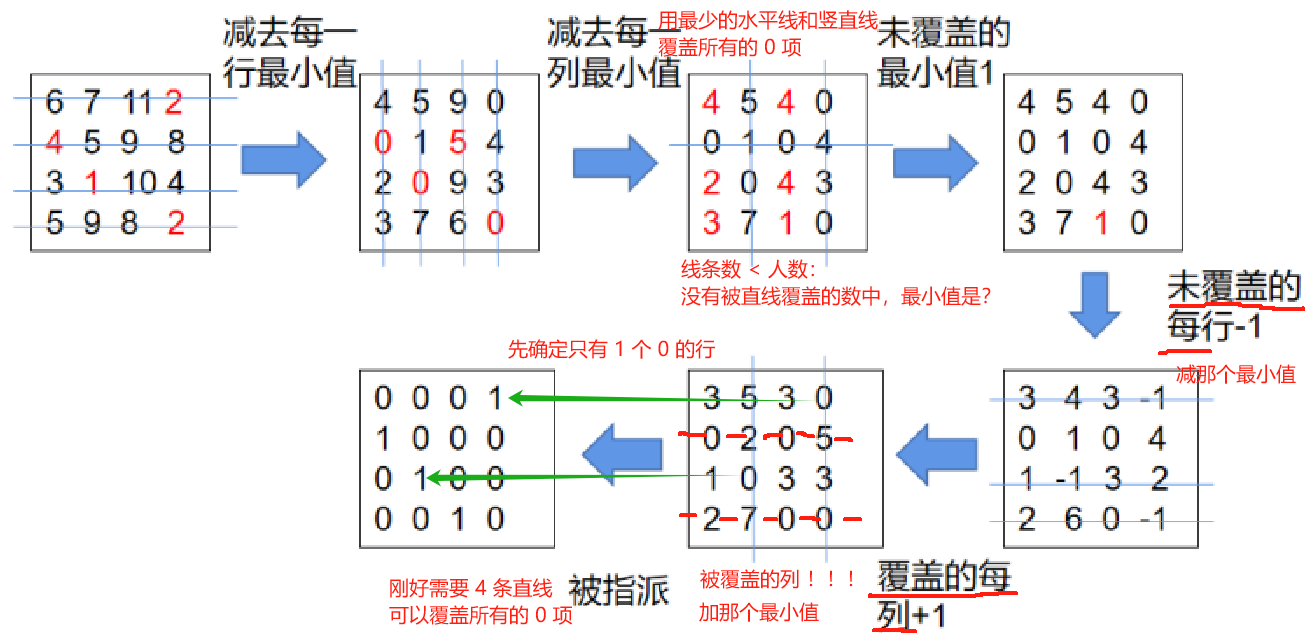

#### 用 scipy.optimize.linear_sum_assignment  求解

In [ ]:
# 根据题目信息， 输入 cost
import numpy as np
cost = np.array([[6, 7, 11, 2],
     [4, 5, 9, 8],
     [3, 1, 10, 4],
     [5, 9, 8, 2]])

from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cost)
print("给每个人分配的任务编号为： ", col_ind+1)
print("最低成本为：", cost[row_ind, col_ind].sum())

给每个人分配的任务编号为：  [4 1 2 3]
最低成本为： 15


### —— 补充： scipy.optimize.linear_sum_assignment 文档整理

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html#scipy.optimize.linear_sum_assignment

Solve the **linear sum assignment** problem.

也称为：
minimum weight matching in bipartite graphs
* 二部图中的最小权重匹配


$~$

$\min~~\sum\limits_i\sum\limits_jC_{i,j}X_{ij}$

* $C_{i,j}$： 员工 $i$ 做任务 $j$ 需要的成本
* $X_{ij}$： 员工 $i$ 是否做任务 $j$



#### 示例

In [ ]:
import numpy as np
cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])

from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cost)
print("给每个人分配的任务编号为： ", col_ind+1 )
print("最低成本为：", cost[row_ind, col_ind].sum())

给每个人分配的任务编号为：  [2 1 3]
最低成本为： 5
